###  GOOGLE STOCK CLOSING PRICE PREDICTOR

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING DATA

In [24]:
df=pd.read_csv("GoogleStockPrices.csv")

In [26]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-02 16:00:00,26.63,26.79,26.39,26.48,1327870
1,2015-01-05 16:00:00,26.36,26.40,25.89,25.97,2059119
2,2015-01-06 16:00:00,26.02,26.06,25.28,25.33,2731813
3,2015-01-07 16:00:00,25.55,25.57,25.18,25.26,2345875
4,2015-01-08 16:00:00,25.08,25.38,24.75,25.35,3662224


In [28]:
df.describe()

,Open,High,Low,Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,82.678052,83.560413,81.831208,82.714996,8.797572e+06
std,43.716508,44.214494,43.257158,43.735891,1.365305e+07
min,24.960000,25.010000,24.550000,24.850000,4.656380e+05
25%,47.367500,47.637500,47.000000,47.380000,1.398751e+06
50%,64.530000,65.045000,63.935000,64.710000,1.876044e+06
75%,119.665000,121.042500,118.592500,119.700000,6.056782e+06
max,197.250000,201.420000,194.980000,196.660000,1.194550e+08


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2516 non-null   object 
 1   Open    2516 non-null   float64
 2   High    2516 non-null   float64
 3   Low     2516 non-null   float64
 4   Close   2516 non-null   float64
 5   Volume  2516 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


In [32]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## DATA PREPROCESSING

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

In [36]:
df

,Date,Open,High,Low,Close,Volume
0,2015-01-02 16:00:00,26.63,26.79,26.39,26.48,1327870
1,2015-01-05 16:00:00,26.36,26.40,25.89,25.97,2059119
2,2015-01-06 16:00:00,26.02,26.06,25.28,25.33,2731813
3,2015-01-07 16:00:00,25.55,25.57,25.18,25.26,2345875
4,2015-01-08 16:00:00,25.08,25.38,24.75,25.35,3662224
...,...,...,...,...,...,...
2511,2024-12-24 13:05:00,194.84,196.11,193.78,196.11,10403259
2512,2024-12-26 16:00:00,195.15,196.75,194.38,195.60,12057210
2513,2024-12-27 16:00:00,194.95,195.32,190.65,192.76,18891362
2514,2024-12-30 16:00:00,189.80,192.55,189.12,191.24,14264659


## DATA VISUALISATION

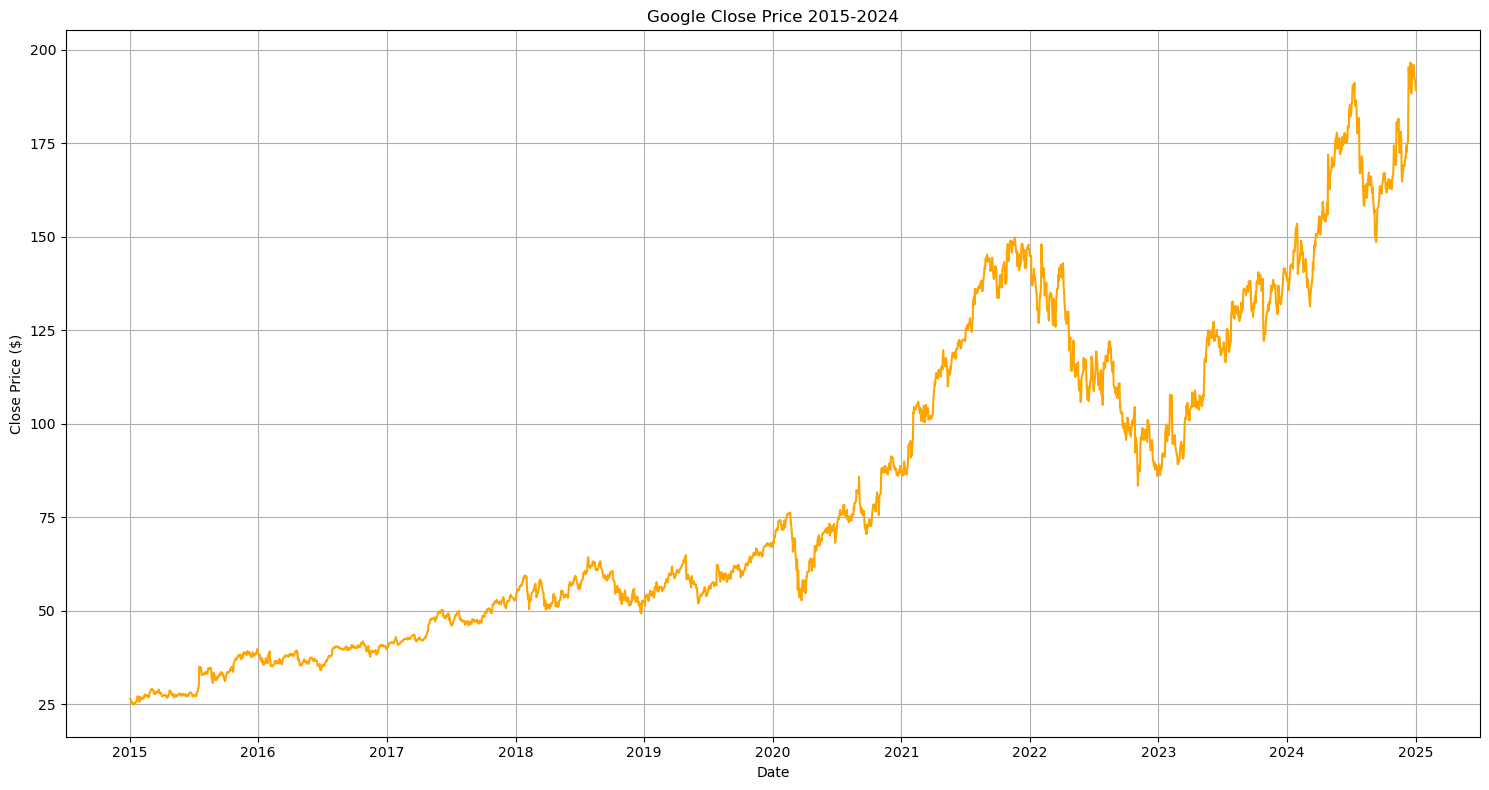

In [50]:
plt.figure(figsize=(15, 8))
plt.plot(df['Date'], df['Close'], color='orange')
plt.title('Google Close Price 2015-2024')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

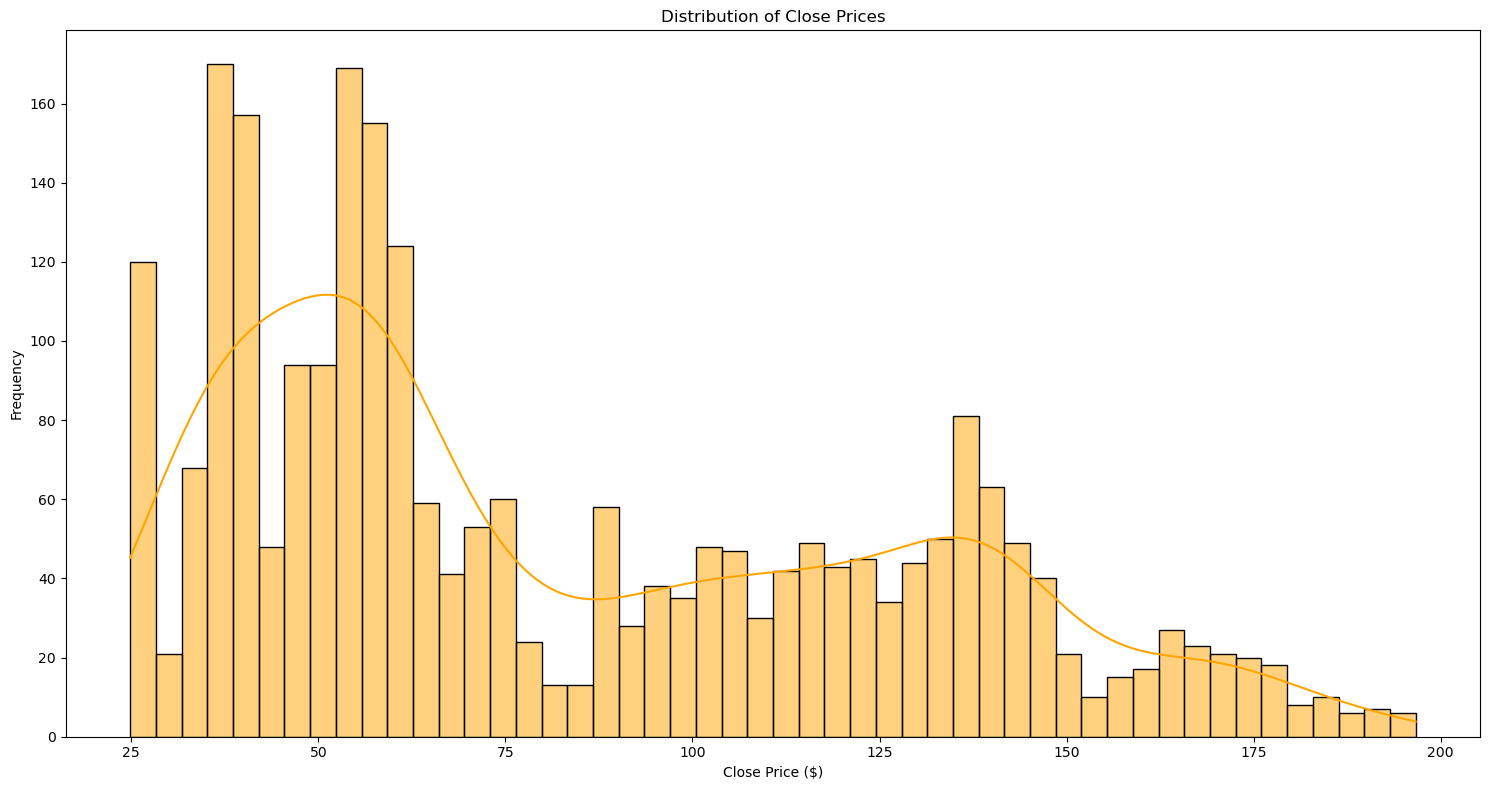

In [52]:
plt.figure(figsize=(15, 8))
sns.histplot(df['Close'], kde=True, bins=50, color='orange')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

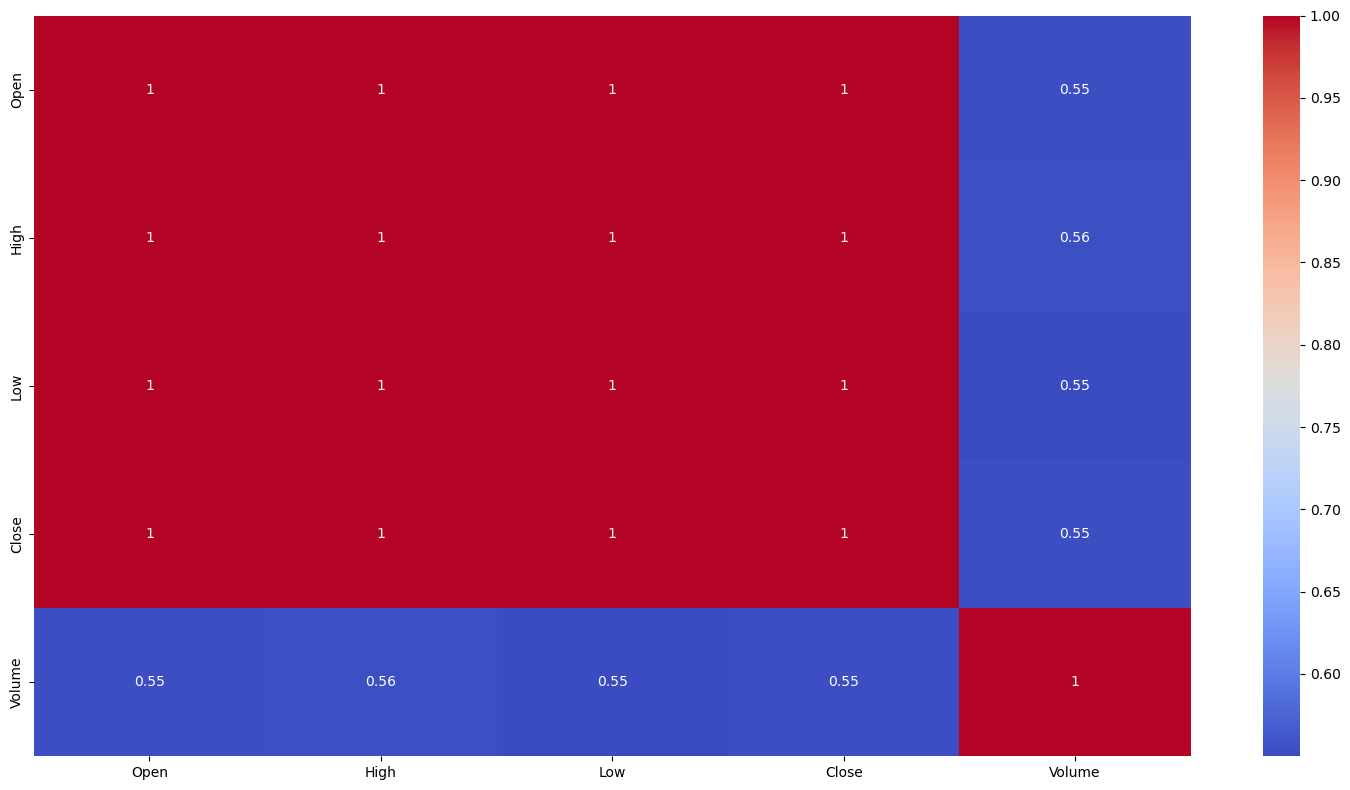

In [54]:
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

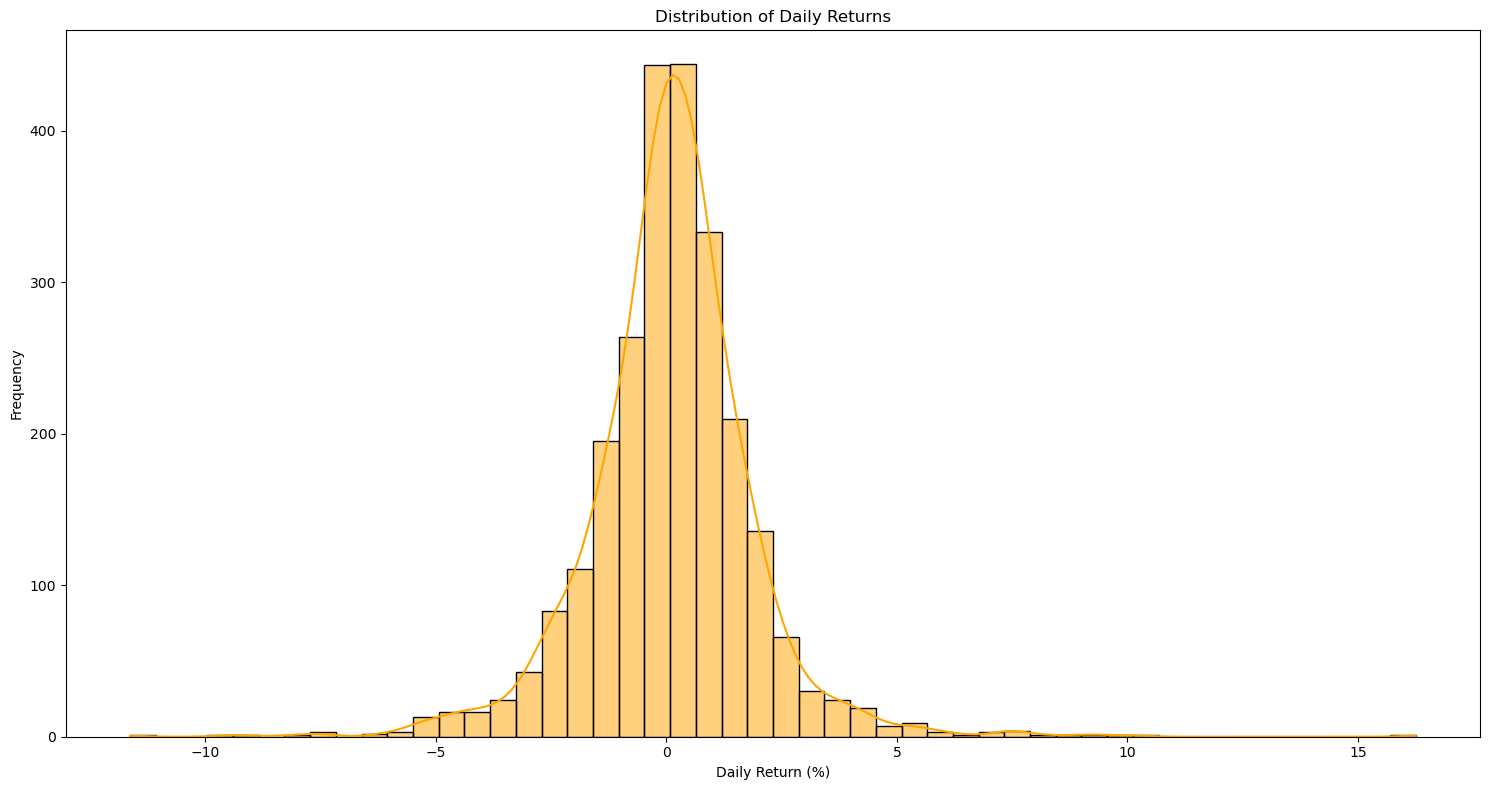

In [58]:
df['Daily_Return'] = df['Close'].pct_change() * 100
df_returns = df.dropna(subset=['Daily_Return'])

plt.figure(figsize=(15, 8))
sns.histplot(df_returns['Daily_Return'], kde=True, bins=50, color='orange')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


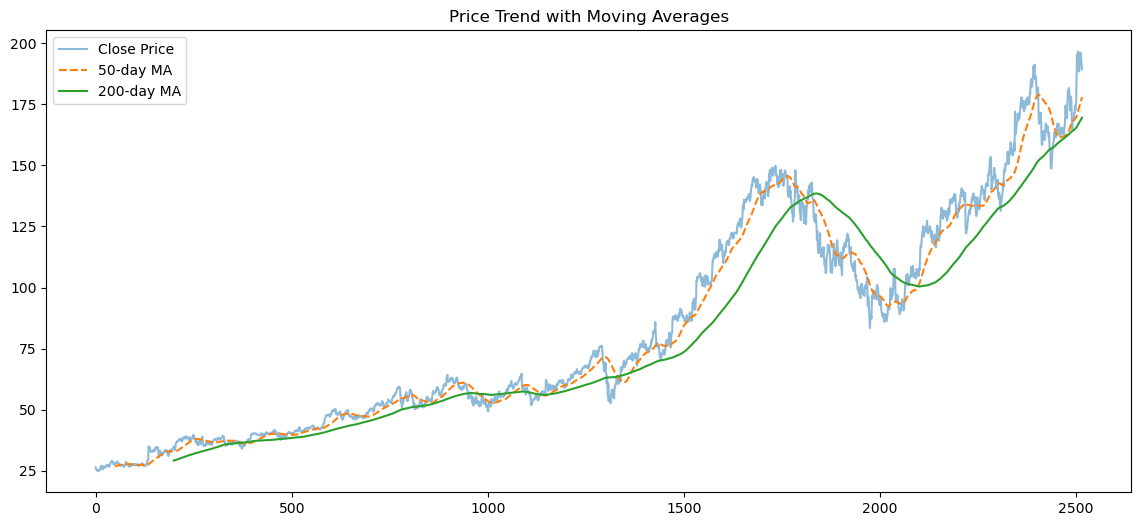

In [62]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Close'].rolling(50).mean(), label='50-day MA', linestyle='--')
plt.plot(df['Close'].rolling(200).mean(), label='200-day MA')
plt.title('Price Trend with Moving Averages')
plt.legend()
plt.show()

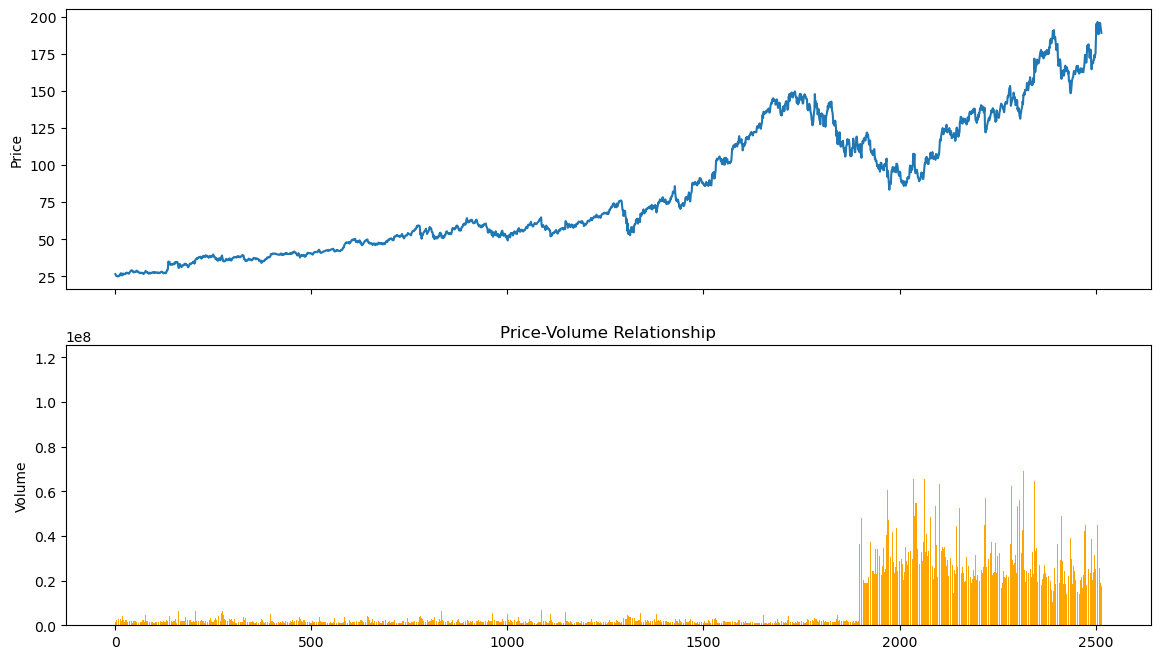

In [81]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,8), sharex=True)
ax1.plot(df['Close'])
ax1.set_ylabel('Price')
ax2.bar(df.index, df['Volume'], color='orange')
ax2.set_ylabel('Volume')
plt.title('Price-Volume Relationship')
plt.show()

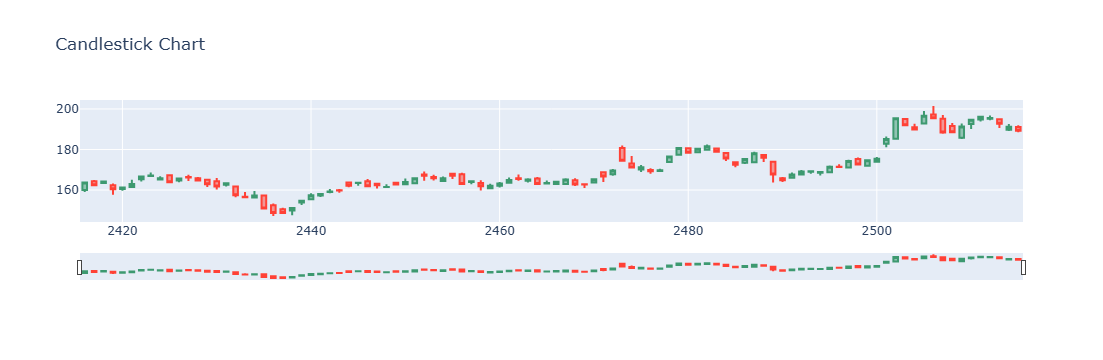

In [70]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x=df.index[-100:],
    open=df['Open'][-100:],
    high=df['High'][-100:],
    low=df['Low'][-100:],
    close=df['Close'][-100:])])
fig.update_layout(title='Candlestick Chart')
fig.show()

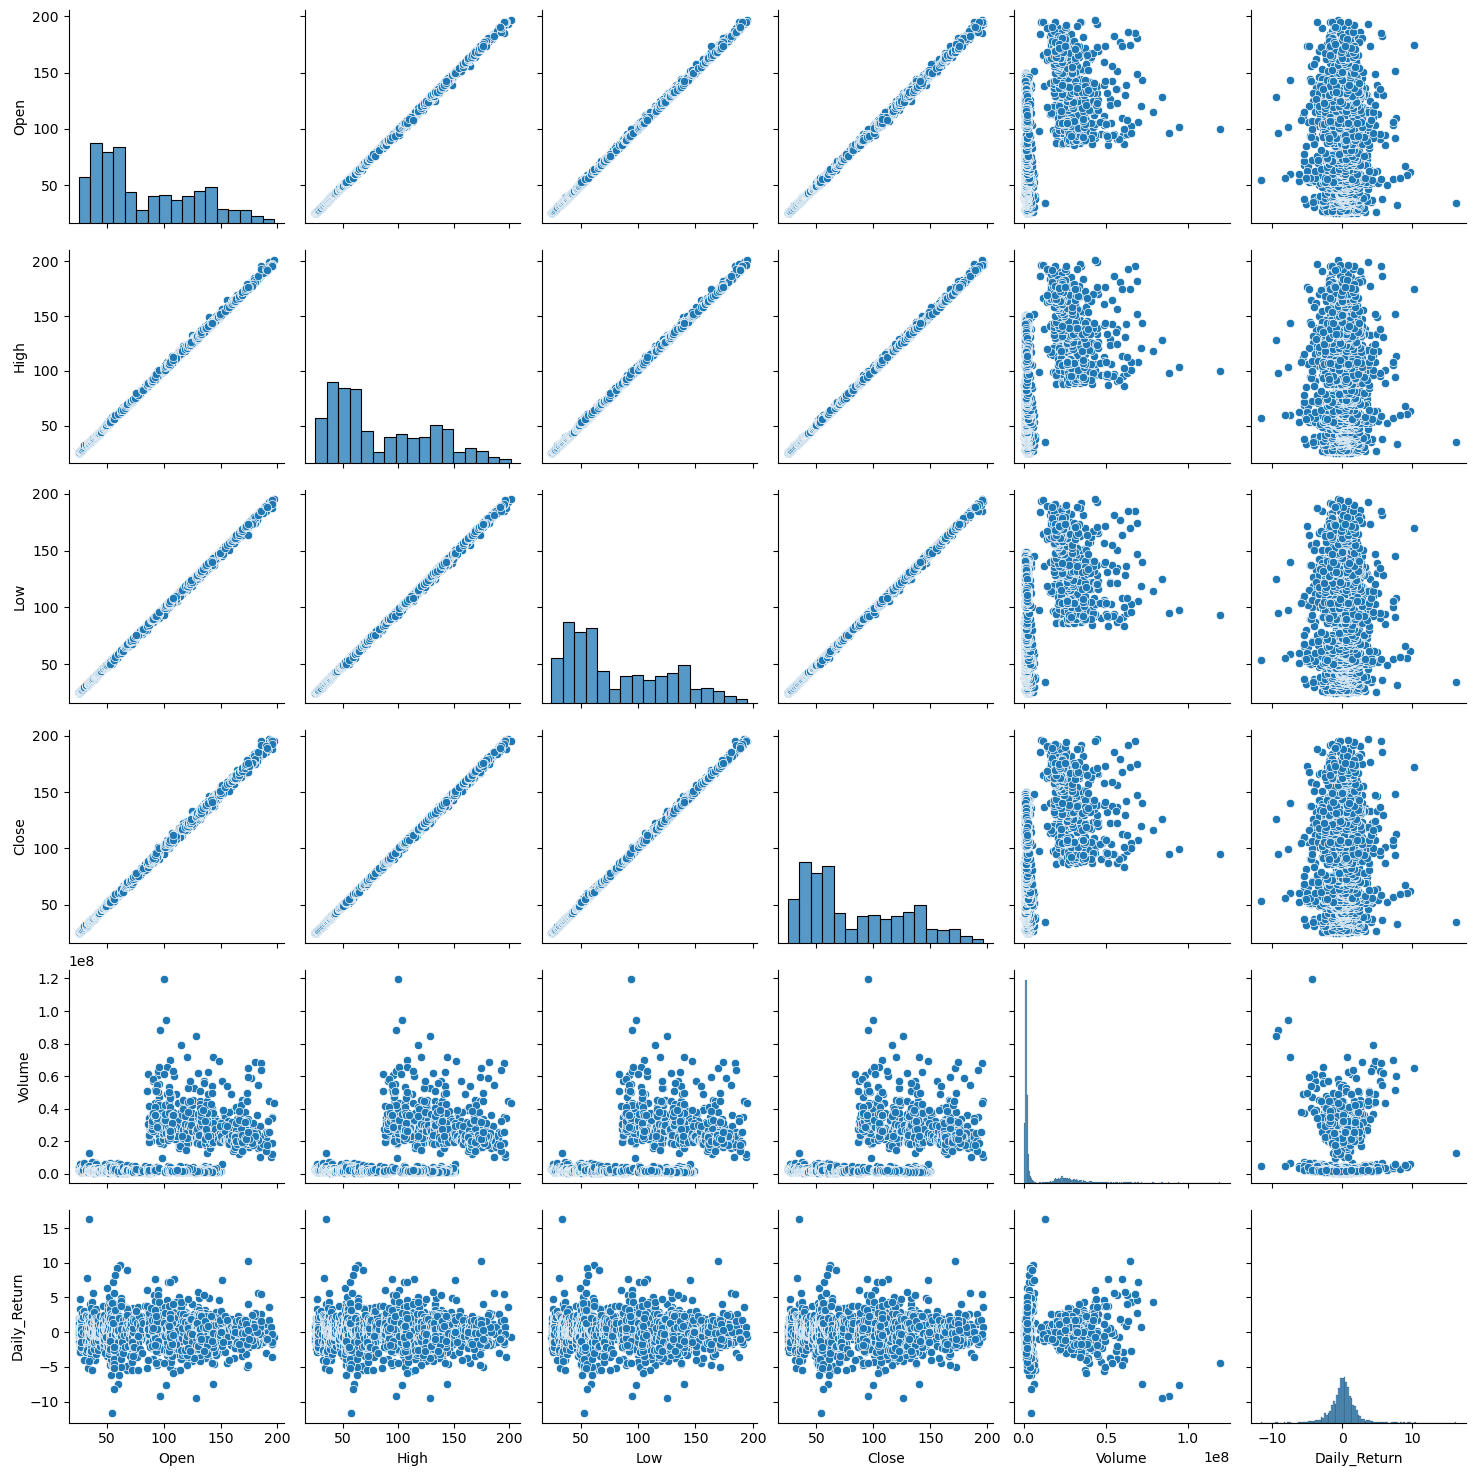

In [80]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_columns = numeric_df.columns
sns.pairplot(numeric_df)
plt.show()

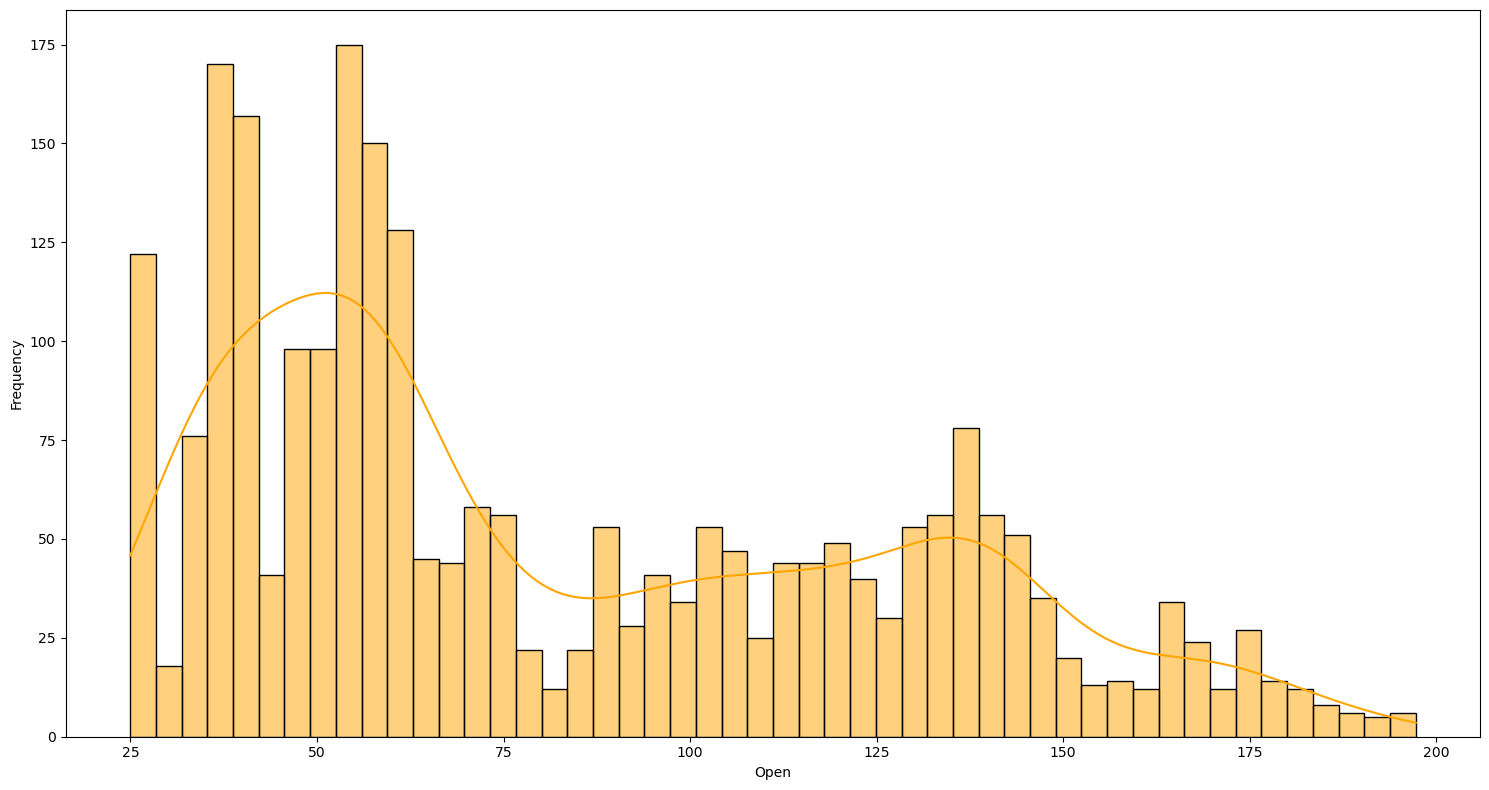

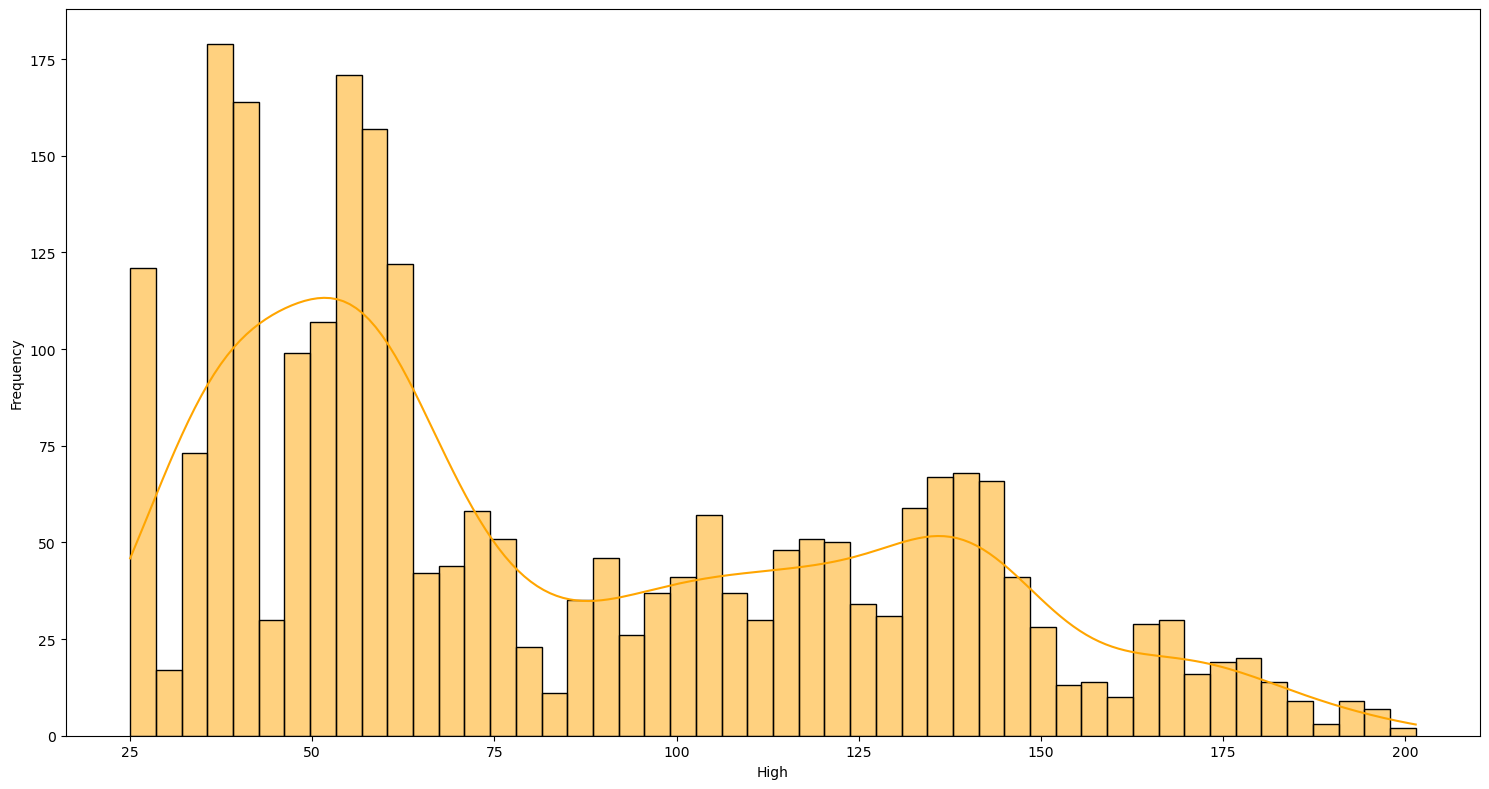

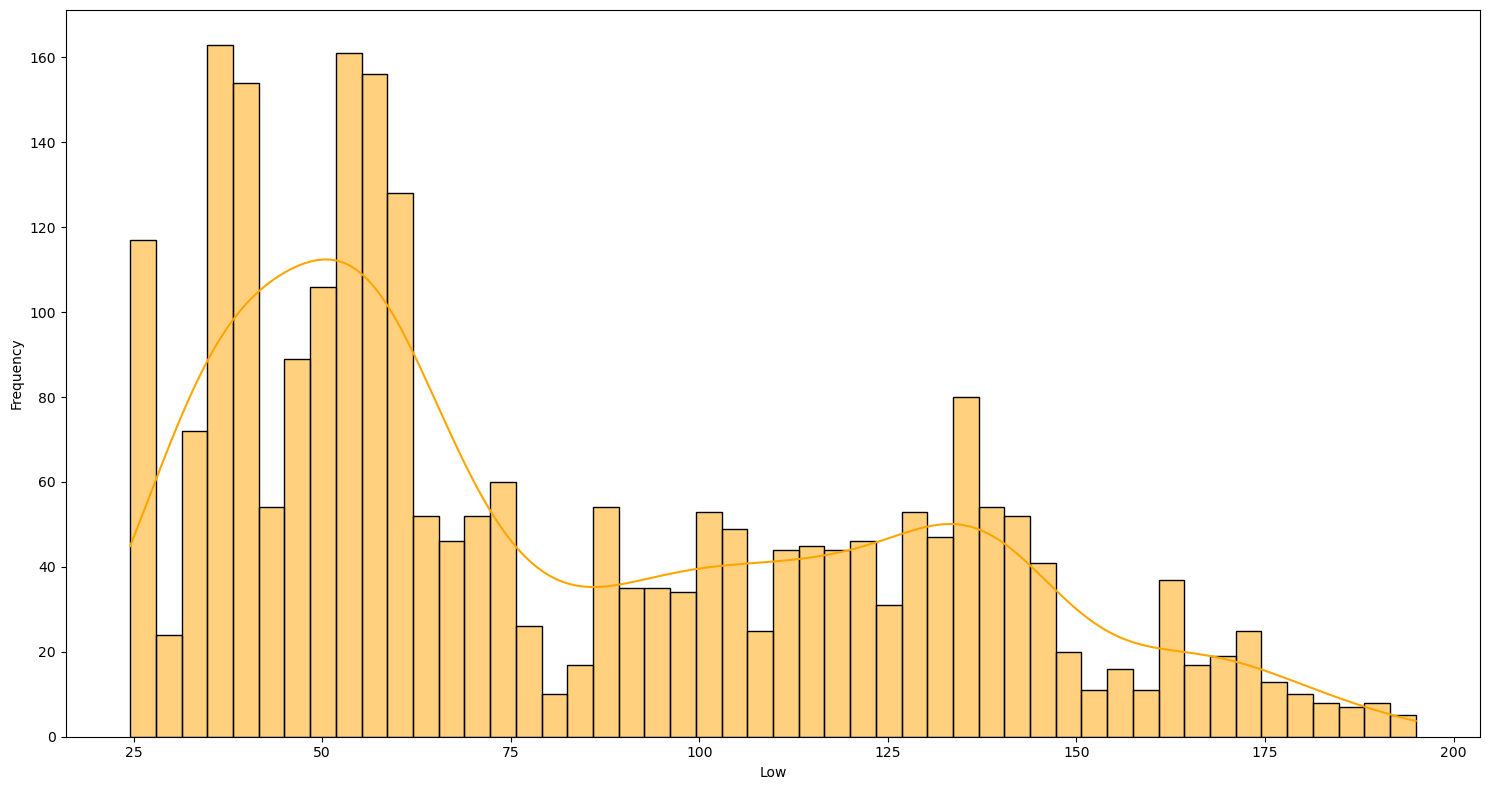

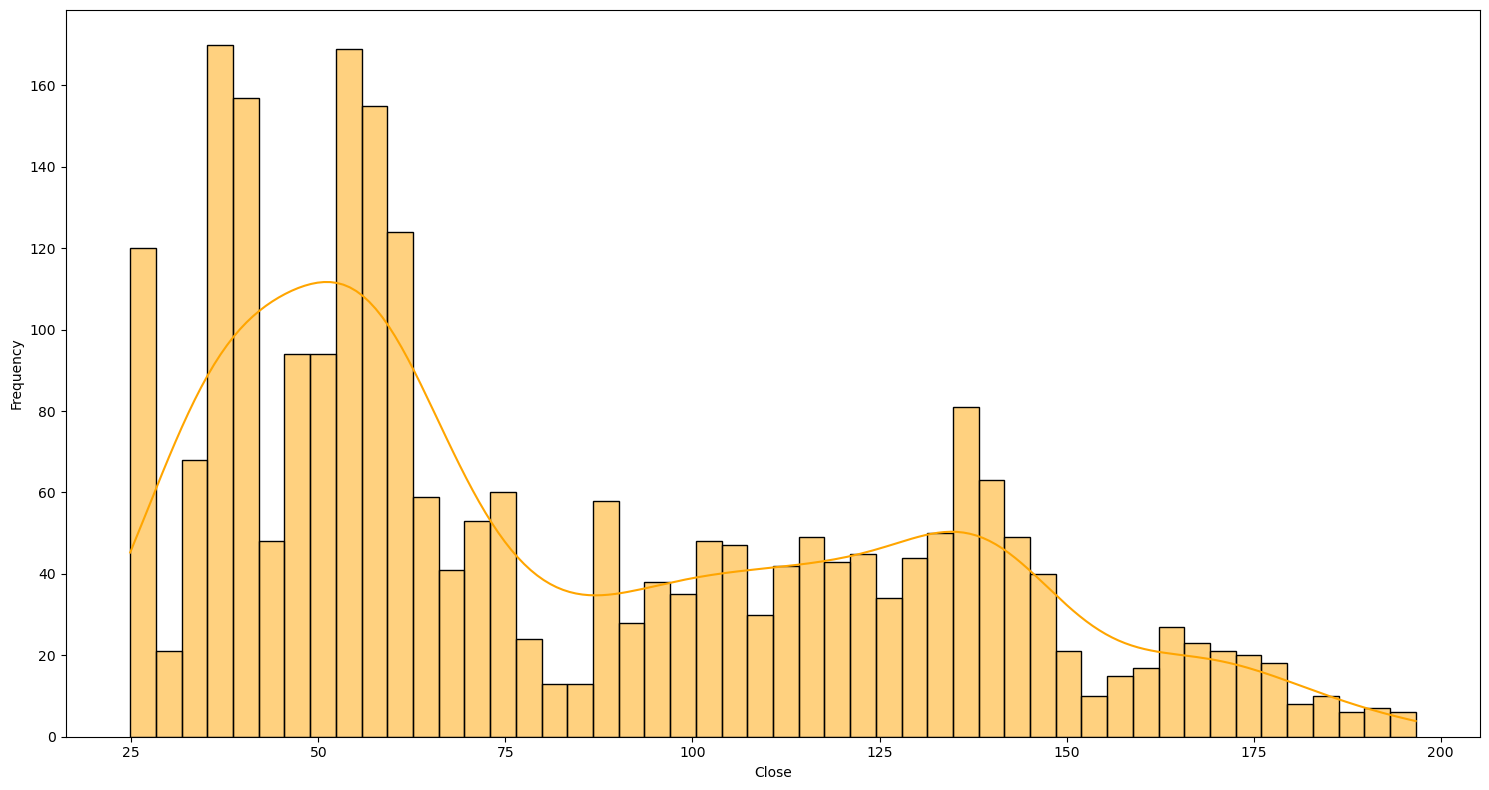

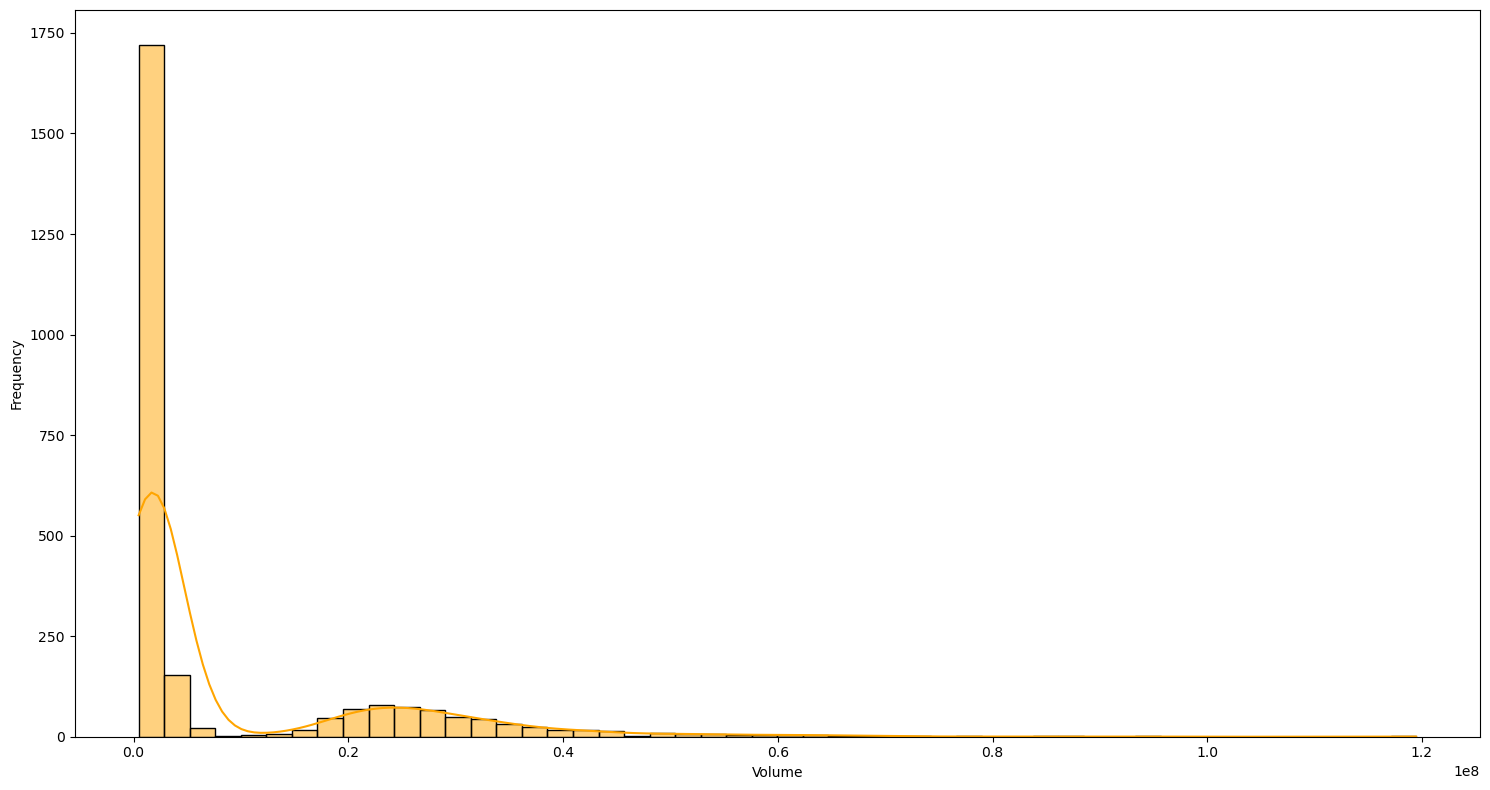

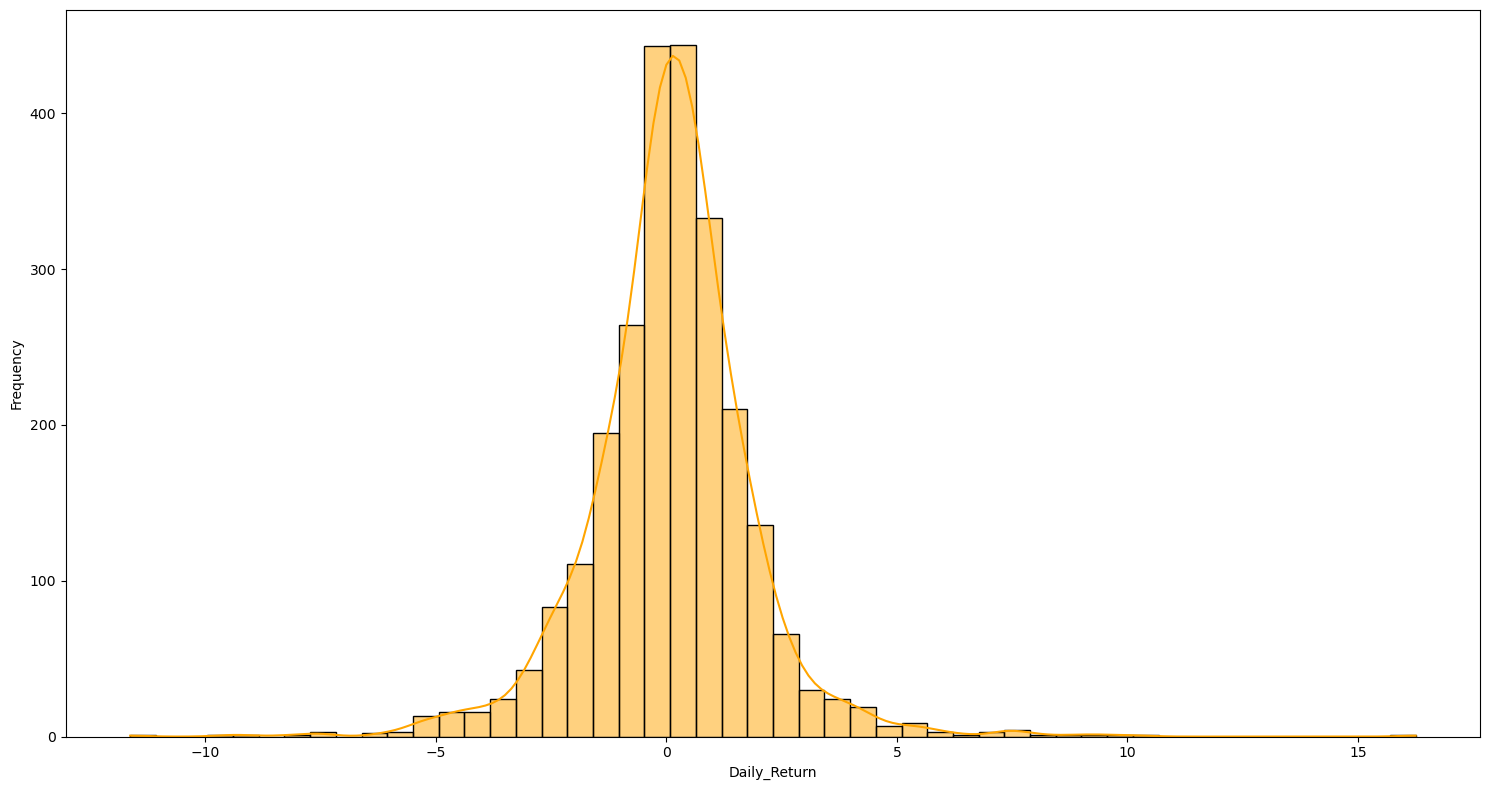

In [86]:
for col in numeric_columns:
    plt.figure(figsize=(15,8))
    sns.histplot(numeric_df[col], bins=50, kde=True, color='orange')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## MODEL TRAINING AND PREDICTION

#LINEAR REGRESSION

R² Score: 0.9991
Mean Squared Error: 0.7075


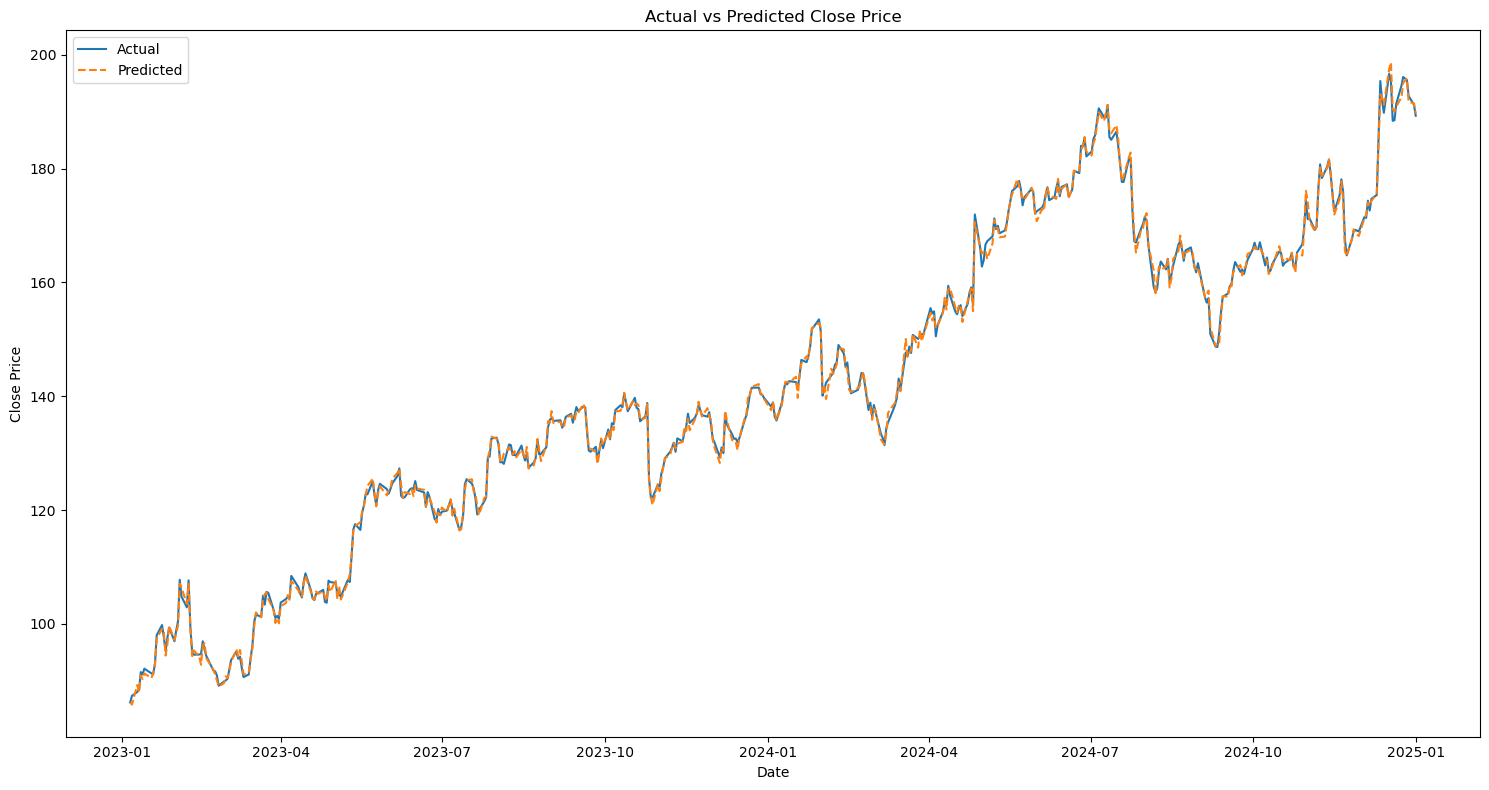

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

df = df.sort_values(by='Date')
X = df[features]
y = df[target]

split_index = int(0.8 * len(df))
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

plt.figure(figsize=(15,8))
plt.plot(df['Date'].iloc[split_index:], y_test.values, label='Actual')
plt.plot(df['Date'].iloc[split_index:], y_pred, linestyle='--', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.tight_layout()
plt.show()

K Neighbours

In [127]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

split_index = int(0.8 * len(df))
X_train = df[features].iloc[:split_index]
X_test = df[features].iloc[split_index:]
y_train = df[target].iloc[:split_index]
y_test = df[target].iloc[split_index:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_neighbors': [3, 5, 7, 10]}
model = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [129]:
model.best_params_["n_neighbors"]

3

In [131]:
r2_score(y_test, y_pred)

-0.2289162140875416

In [133]:
mean_squared_error(y_test, y_pred)

917.256963688889

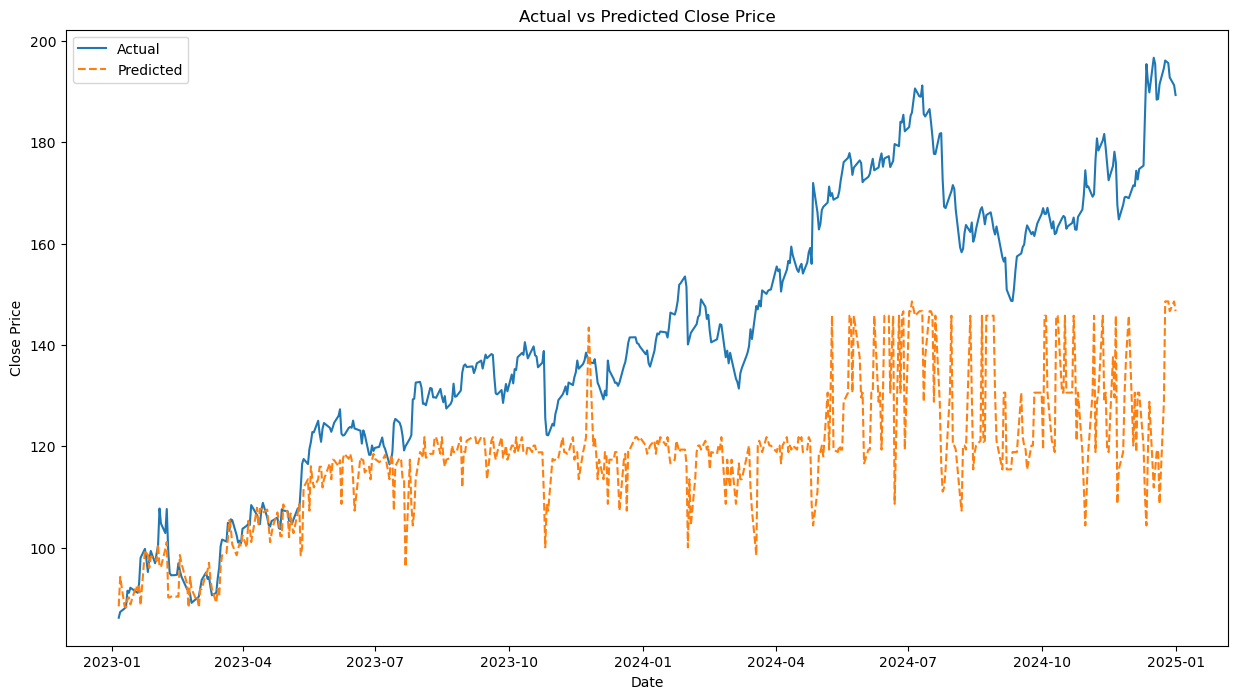

In [135]:
plt.figure(figsize=(15,8))
plt.plot(df['Date'].iloc[split_index:], y_test.values, label='Actual')
plt.plot(df['Date'].iloc[split_index:], y_pred, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()